In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
classification=pd.read_csv('classification.csv',dtype='unicode',)
c_d=pd.read_csv('customer_Demo.csv',dtype='unicode')
deal=pd.read_csv('deal.csv',dtype='unicode')
o_a=pd.read_csv('online_action.csv',dtype='unicode')

상품 분류코드나 상품명은 EDA 과정에서 필요없다고 판단하였다.

In [3]:
classification.head()

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades


In [4]:
c_d.tail()

,clnt_id,clnt_gender,clnt_age
72394,72425,unknown,unknown
72395,72426,unknown,unknown
72396,72427,unknown,unknown
72397,72428,unknown,unknown
72398,72429,unknown,unknown


# 고객정보
성별정보와 나이정보에서는 unknown(결측치)값이 상당한 빈도수로 나타남을 확인할 수 있다.

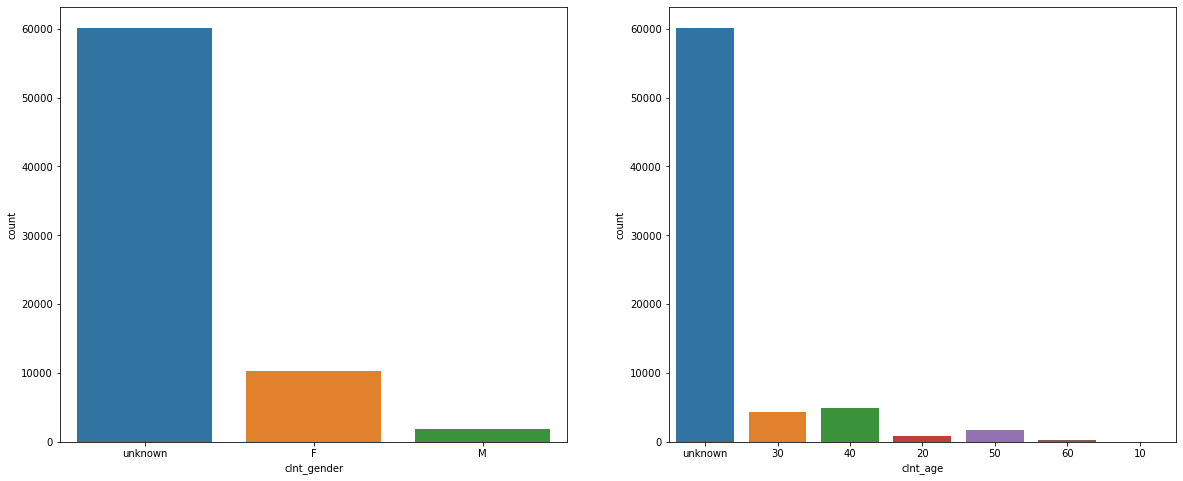

In [5]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
ax1=sns.countplot(x='clnt_gender',data=c_d, ax=axes[0])
ax2=sns.countplot(x='clnt_age',data=c_d, ax=axes[1])

## unknown 값을 (np.nan) 결측치로 바꿔준 다음 (dropna 활용하기 위해) 제거해준다.

## 하지만 고객의 정보를 나중에 병합할 것이기 때문에 결측치를 없애지 않고 병합 후에 제거하도록 한다.

In [6]:
c_d['clnt_gender'].replace('unknown',np.nan,inplace=True)
c_d['clnt_age'].replace('unknown',np.nan,inplace=True)

In [7]:
#c_d.dropna(inplace=True)

In [8]:
c_d.tail()

,clnt_id,clnt_gender,clnt_age
72394,72425,NaN,NaN
72395,72426,NaN,NaN
72396,72427,NaN,NaN
72397,72428,NaN,NaN
72398,72429,NaN,NaN


# 온라인 행동정보

In [9]:
o_a

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,07809,001,008,5,A03,20190913,01:16,2571103,NaN,NaN,34,2663,DIRECT,NaN
1,07809,001,004,2,A03,20190913,01:14,2485909,NaN,NaN,34,2663,DIRECT,NaN
2,07809,001,011,5,A03,20190913,01:17,2646597,NaN,NaN,34,2663,DIRECT,NaN
3,07809,001,001,2,A03,20190913,00:46,788304,NaN,NaN,34,2663,DIRECT,NaN
4,07809,001,009,5,A03,20190913,01:17,2617609,NaN,NaN,34,2663,DIRECT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196357,31040,001,001,0,A02,20190815,03:47,13525,NaN,다이슨 에어랩,4,62,unknown,mobile_web
3196358,04129,001,002,0,A02,20190721,01:22,250099,NaN,여성메탈시계,3,250,unknown,mobile_web
3196359,04129,001,001,0,A02,20190721,01:18,1525,NaN,여성메탈시계,3,250,unknown,mobile_web
3196360,54403,003,001,0,A02,20190731,20:14,16905,NaN,비비고왕교자,3,68,unknown,mobile_app


# 거래정보

In [10]:
deal

,clnt_id,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,21922,104999,001,A03,unknown,20190920,12:41,5990,1
1,21279,104907,004,A03,unknown,20190920,10:27,10900,1
2,39423,105124,011,A03,unknown,20190920,17:26,12900,1
3,18362,104010,001,A03,unknown,20190920,09:57,9900,1
4,39423,105124,013,A03,0565,20190920,17:26,2990,1
...,...,...,...,...,...,...,...,...,...
599956,35311,002839,003,B03,0339,20190927,14:09,3500,1
599957,35311,002839,004,B03,0339,20190927,14:09,3600,2
599958,35311,002839,005,B03,0339,20190927,14:09,3500,1
599959,35311,002839,002,B03,0339,20190927,14:09,4500,1


In [11]:
for col in o_a.columns :
    msg = '{:>10}\t 의 비어있는 자료비율 : {:.2f}%'.format(col, 100 * (o_a[col].isnull().sum() / o_a[col].shape[0]))
    print(msg)

   clnt_id	 의 비어있는 자료비율 : 0.00%
   sess_id	 의 비어있는 자료비율 : 0.00%
   hit_seq	 의 비어있는 자료비율 : 0.00%
action_type	 의 비어있는 자료비율 : 0.00%
  biz_unit	 의 비어있는 자료비율 : 0.00%
   sess_dt	 의 비어있는 자료비율 : 0.00%
    hit_tm	 의 비어있는 자료비율 : 0.00%
hit_pss_tm	 의 비어있는 자료비율 : 0.00%
  trans_id	 의 비어있는 자료비율 : 98.22%
  sech_kwd	 의 비어있는 자료비율 : 79.61%
tot_pag_view_ct	 의 비어있는 자료비율 : 0.04%
tot_sess_hr_v	 의 비어있는 자료비율 : 1.80%
  trfc_src	 의 비어있는 자료비율 : 0.00%
dvc_ctg_nm	 의 비어있는 자료비율 : 55.77%


In [12]:
for col in deal.columns :
    msg = '{:>10}\t 의 비어있는 자료비율 : {:.2f}%'.format(col, 100 * (deal[col].isnull().sum() / deal[col].shape[0]))
    print(msg)

   clnt_id	 의 비어있는 자료비율 : 0.00%
  trans_id	 의 비어있는 자료비율 : 0.00%
 trans_seq	 의 비어있는 자료비율 : 0.00%
  biz_unit	 의 비어있는 자료비율 : 0.00%
      pd_c	 의 비어있는 자료비율 : 0.00%
     de_dt	 의 비어있는 자료비율 : 0.00%
     de_tm	 의 비어있는 자료비율 : 0.00%
    buy_am	 의 비어있는 자료비율 : 0.00%
    buy_ct	 의 비어있는 자료비율 : 0.00%


# 두가지 관점에서 EDA를 진행
## + raw data 를 merge 한 뒤 전처리, EDA 과정을 진행
## ++ raw data 자체를 전처리,EDA 과정을 진행

# 1번과정(병합데이터) EDA 먼저 진행
## 고객 Demo 정보와 거래정보를 병합.. 거래정보가 있는 고객들로만 병합하였음.
## 미리 병합한 이유는 온라인 행동정보 데이터의 전처리 과정에서 병합된 데이터에서 필요한 데이터가 미리 전처리가 되어 EDA 과정에서 가용이 불가할 수 있기때문에.

In [13]:
df_cd=pd.merge(c_d,deal)
df_cd

,clnt_id,clnt_gender,clnt_age,trans_id,trans_seq,biz_unit,pd_c,de_dt,de_tm,buy_am,buy_ct
0,00002,F,30,065505,001,A03,0092,20190801,22:00,9000,5
1,00002,F,30,064691,005,A03,0092,20190731,21:25,1800,1
2,00002,F,30,064691,002,A03,0151,20190731,21:25,3990,1
3,00002,F,30,064691,003,A03,0351,20190731,21:25,4690,1
4,00002,F,30,062037,001,A03,0092,20190729,23:47,36000,20
...,...,...,...,...,...,...,...,...,...,...,...
599956,72424,M,40,136596,020,B01,0862,20190727,11:22,2000,1
599957,72424,M,40,136596,014,B01,1189,20190727,11:22,3960,2
599958,72424,M,40,136596,022,B01,0862,20190727,11:22,2000,2
599959,72424,M,40,085065,001,A01,1316,20190826,11:54,99000,1


## 모든 데이터를 병합시킨 데이터 df_hbl 생성
거래정보가 있는 고객들의 온라인행동정보이기 때문에 행동정보가 구매완료와 구매환불 
(action_type=6,7) 밖에 없을것이라고 기대

In [14]:
df_hbl=pd.merge(o_a,df_cd)
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,006,1568,20190716,11:41,1000,1
1,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,007,1583,20190716,11:41,1000,1
2,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,005,1625,20190716,11:41,1290,1
3,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,008,1394,20190716,11:41,100,1
4,28304,001,022,6,A03,20190716,11:41,1212297,051903,NaN,...,PUSH,mobile_web,F,50,001,0515,20190716,11:41,7980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,10:49,1200556,069636,NaN,...,unknown,mobile_app,F,40,001,1316,20190806,10:49,55000,1
127354,04355,019,005,6,A01,20190806,10:49,1200556,069636,NaN,...,unknown,mobile_app,F,40,002,1015,20190806,10:49,12900,1
127355,45318,001,001,6,A01,20190927,03:02,229247,110554,NaN,...,unknown,mobile_web,F,40,001,0666,20190927,03:02,26800,1
127356,52942,103,008,6,A01,20190823,00:46,2776837,082877,NaN,...,unknown,mobile_web,F,40,001,0999,20190823,09:10,149400,1


## 고객정보에서는 상당히 많은 결측치를 보여줬는데 실제 거래를 한 회원은 모두 나이와 성별정보를 기입했다.

In [15]:
for col in df_hbl.columns :
    msg = '{:>10}\t 의 비어있는 자료비율 : {:.2f}%'.format(col, 100 * (df_hbl[col].isnull().sum() / df_hbl[col].shape[0]))
    print(msg)

   clnt_id	 의 비어있는 자료비율 : 0.00%
   sess_id	 의 비어있는 자료비율 : 0.00%
   hit_seq	 의 비어있는 자료비율 : 0.00%
action_type	 의 비어있는 자료비율 : 0.00%
  biz_unit	 의 비어있는 자료비율 : 0.00%
   sess_dt	 의 비어있는 자료비율 : 0.00%
    hit_tm	 의 비어있는 자료비율 : 0.00%
hit_pss_tm	 의 비어있는 자료비율 : 0.00%
  trans_id	 의 비어있는 자료비율 : 0.00%
  sech_kwd	 의 비어있는 자료비율 : 100.00%
tot_pag_view_ct	 의 비어있는 자료비율 : 0.00%
tot_sess_hr_v	 의 비어있는 자료비율 : 0.24%
  trfc_src	 의 비어있는 자료비율 : 0.00%
dvc_ctg_nm	 의 비어있는 자료비율 : 71.83%
clnt_gender	 의 비어있는 자료비율 : 0.00%
  clnt_age	 의 비어있는 자료비율 : 0.00%
 trans_seq	 의 비어있는 자료비율 : 0.00%
      pd_c	 의 비어있는 자료비율 : 0.00%
     de_dt	 의 비어있는 자료비율 : 0.00%
     de_tm	 의 비어있는 자료비율 : 0.00%
    buy_am	 의 비어있는 자료비율 : 0.00%
    buy_ct	 의 비어있는 자료비율 : 0.00%


## 고객정보의 결측치가 병합과정 문제를 일으킬것이라고 생각했지만 문제없었기 때문에 결측치 처리를 해준다

In [16]:
c_d.dropna(inplace=True)

## 병합한 데이터(df_hbl)의 컬럼벌 결측치 비율을 시각화.

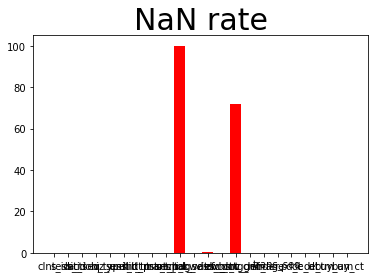

In [17]:
plt.bar(df_hbl.columns, (100*(df_hbl.isnull().sum()/df_hbl.shape[0])),color="red")
plt.title("NaN rate",fontsize=30)
plt.show()

## 결측치가 높은 컬럼은 EDA 과정에서 가용하지 어렵기 때문에 삭제

In [18]:
df_hbl.drop('sech_kwd',axis=1,inplace=True)
df_hbl.drop('dvc_ctg_nm',axis=1,inplace=True)

# 행동유형 시각화를 통해 기대한대로 온라인행동정보와 거래정보, 고객정보를 병합했을 때는 행동유형이 제한됨을 알 수 있었다.
어찌보면 거래한 고객들만 뽑은 것이기 때문에 당연한 결과였다.

추가적으로 환불한 사람들은 왜 환불을 했을까 하는 궁금증이 생겼다.

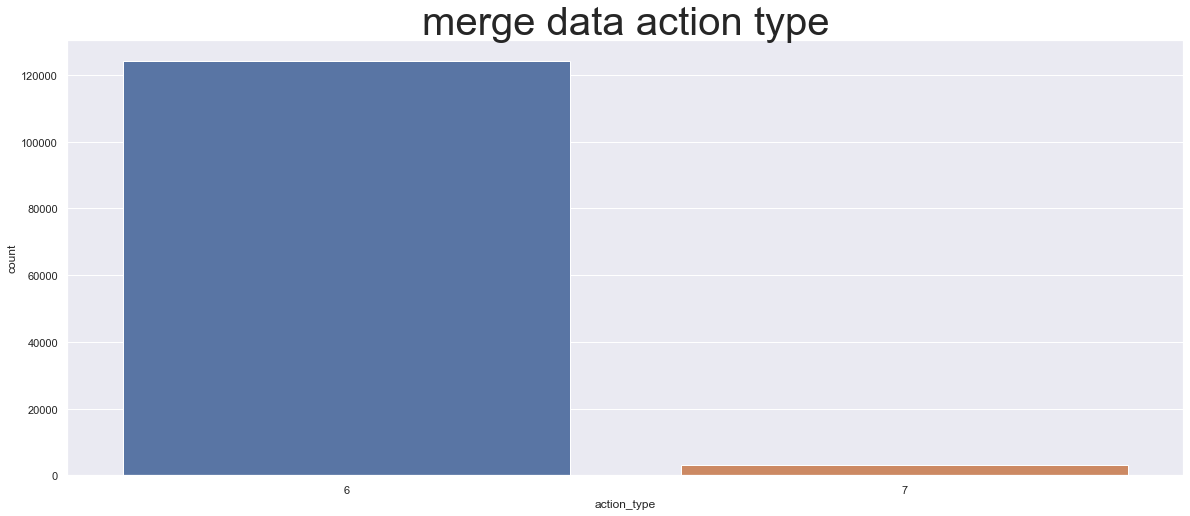

In [19]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x='action_type',data=df_hbl)
plt.title("merge data action type",fontsize=40)
plt.show()

고객아이디가 중복된다 -> 한 고객이 여러 행동을 했을 수 있다.

-> 고객아이디의 중복값을 제거했을 때도 행동유형이 비슷한 비율로 나올까?

In [20]:
df_hbl['clnt_id'].value_counts()

54703    229
49906    225
22910    222
30018    216
49028    214
        ... 
70193      1
32108      1
36380      1
20231      1
23318      1
Name: clnt_id, Length: 8869, dtype: int64

In [21]:
df_hbl_clntnum=df_hbl.drop_duplicates('clnt_id',keep='first')
df_hbl_clntnum

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,trfc_src,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,001,022,6,A03,20190716,11:41,1212297,051903,56,1303,PUSH,F,50,006,1568,20190716,11:41,1000,1
8,49353,036,108,6,A03,20190820,10:38,1936038,080007,122,2006,DIRECT,F,30,006,0179,20190820,10:38,9900,1
81,02154,005,067,6,A03,20190730,19:43,6103422,063786,77,6131,DIRECT,M,40,004,1395,20190730,19:43,5700,2
92,25279,013,011,6,A03,20190822,15:36,1591652,081793,34,2146,DIRECT,F,60,008,1573,20190822,15:36,2490,1
131,36785,002,041,6,A03,20190918,10:52,3850467,103046,31,5210,PUSH,F,30,010,0516,20190918,10:52,2490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127340,43761,001,003,6,A01,20190708,12:33,603156,045730,71,605,unknown,F,30,001,1524,20190708,12:33,19000,1
127342,19004,001,001,6,A01,20190927,00:54,227713,110545,35,228,unknown,M,20,001,1659,20190927,00:54,24000,1
127343,02442,004,001,6,A01,20190813,08:57,561500,075041,32,561,unknown,F,40,001,1507,20190813,08:57,14000,1
127345,01743,002,002,6,A01,20190929,00:49,1906087,111987,255,5714,unknown,F,50,002,0873,20190930,07:37,15200,1


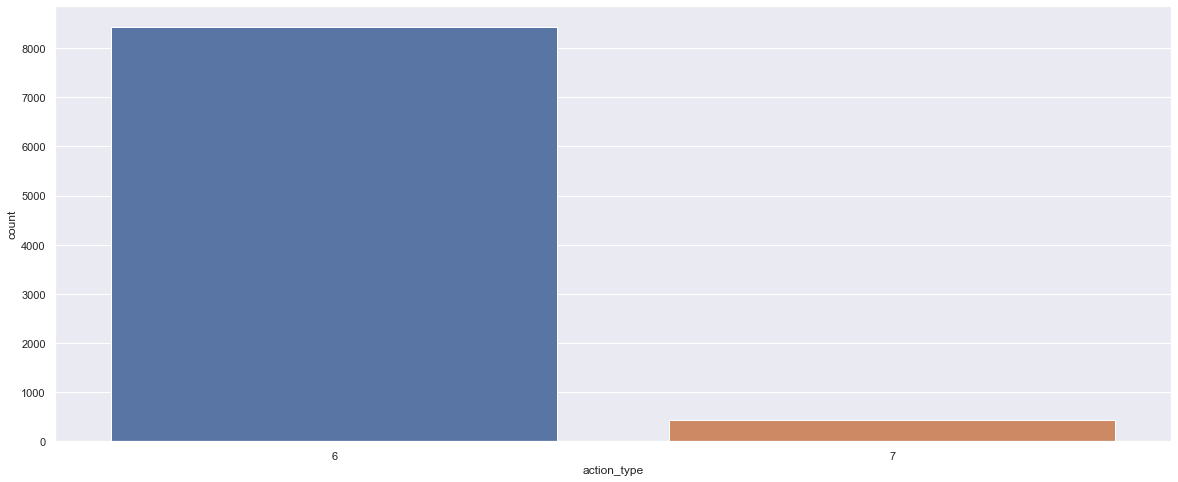

In [22]:
sns.countplot(x='action_type',data=df_hbl_clntnum)

## 중복 고객아이디를 제거해도 행동유형이 비슷한 비율로 나타남을 알 수 있었다.

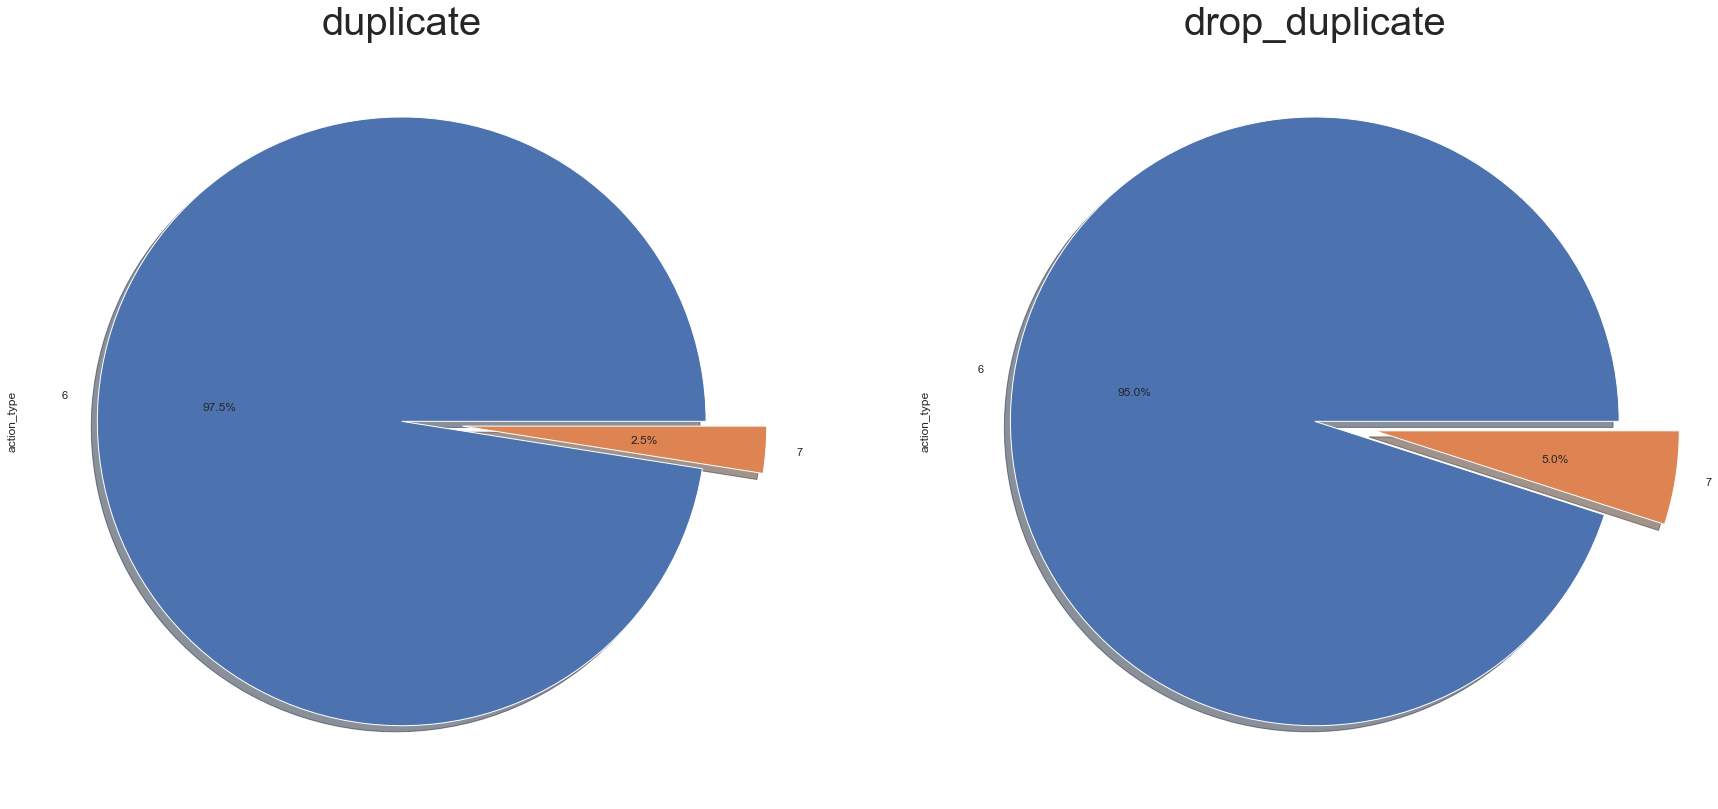

In [23]:
fig,axes=plt.subplots(1,2,figsize=(30,15))
ax1=df_hbl['action_type'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', shadow=True,ax=axes[0])
ax2=df_hbl_clntnum['action_type'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', shadow=True,ax=axes[1])
ax1.set_title("duplicate",fontsize=40)
ax2.set_title("drop_duplicate",fontsize=40)
plt.show()

In [24]:
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,trfc_src,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,001,022,6,A03,20190716,11:41,1212297,051903,56,1303,PUSH,F,50,006,1568,20190716,11:41,1000,1
1,28304,001,022,6,A03,20190716,11:41,1212297,051903,56,1303,PUSH,F,50,007,1583,20190716,11:41,1000,1
2,28304,001,022,6,A03,20190716,11:41,1212297,051903,56,1303,PUSH,F,50,005,1625,20190716,11:41,1290,1
3,28304,001,022,6,A03,20190716,11:41,1212297,051903,56,1303,PUSH,F,50,008,1394,20190716,11:41,100,1
4,28304,001,022,6,A03,20190716,11:41,1212297,051903,56,1303,PUSH,F,50,001,0515,20190716,11:41,7980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,10:49,1200556,069636,85,1200,unknown,F,40,001,1316,20190806,10:49,55000,1
127354,04355,019,005,6,A01,20190806,10:49,1200556,069636,85,1200,unknown,F,40,002,1015,20190806,10:49,12900,1
127355,45318,001,001,6,A01,20190927,03:02,229247,110554,20,271,unknown,F,40,001,0666,20190927,03:02,26800,1
127356,52942,103,008,6,A01,20190823,00:46,2776837,082877,216,3208,unknown,F,40,001,0999,20190823,09:10,149400,1


# EDA 과정에서 시간대와 비교하여 행동유형을 파악할것이기 때문에 시간변수를 읽을수 있게 특수문자를 제거한 후 타입변경을 해준다.

In [25]:
df_hbl['hit_tm']=df_hbl['hit_tm'].replace(':','',regex=True).astype(int)
df_hbl['de_tm']=df_hbl['de_tm'].replace(':','',regex=True).astype(int)
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,trfc_src,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct
0,28304,001,022,6,A03,20190716,1141,1212297,051903,56,1303,PUSH,F,50,006,1568,20190716,1141,1000,1
1,28304,001,022,6,A03,20190716,1141,1212297,051903,56,1303,PUSH,F,50,007,1583,20190716,1141,1000,1
2,28304,001,022,6,A03,20190716,1141,1212297,051903,56,1303,PUSH,F,50,005,1625,20190716,1141,1290,1
3,28304,001,022,6,A03,20190716,1141,1212297,051903,56,1303,PUSH,F,50,008,1394,20190716,1141,100,1
4,28304,001,022,6,A03,20190716,1141,1212297,051903,56,1303,PUSH,F,50,001,0515,20190716,1141,7980,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,1049,1200556,069636,85,1200,unknown,F,40,001,1316,20190806,1049,55000,1
127354,04355,019,005,6,A01,20190806,1049,1200556,069636,85,1200,unknown,F,40,002,1015,20190806,1049,12900,1
127355,45318,001,001,6,A01,20190927,302,229247,110554,20,271,unknown,F,40,001,0666,20190927,302,26800,1
127356,52942,103,008,6,A01,20190823,46,2776837,082877,216,3208,unknown,F,40,001,0999,20190823,910,149400,1


## 범주형변수 시간대 생성 0시~23시 / 조회시각과 구매시각

In [26]:
for i in range(24):
    df_hbl.loc[(df_hbl['hit_tm']>(i*100)-1)&(df_hbl['hit_tm']<=(i*100)+59),'h_time']=i
    df_hbl.loc[(df_hbl['de_tm']>(i*100)-1)&(df_hbl['de_tm']<=(i*100)+59),'d_time']=i
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,tot_pag_view_ct,...,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,de_tm,buy_am,buy_ct,h_time,d_time
0,28304,001,022,6,A03,20190716,1141,1212297,051903,56,...,F,50,006,1568,20190716,1141,1000,1,11.0,11.0
1,28304,001,022,6,A03,20190716,1141,1212297,051903,56,...,F,50,007,1583,20190716,1141,1000,1,11.0,11.0
2,28304,001,022,6,A03,20190716,1141,1212297,051903,56,...,F,50,005,1625,20190716,1141,1290,1,11.0,11.0
3,28304,001,022,6,A03,20190716,1141,1212297,051903,56,...,F,50,008,1394,20190716,1141,100,1,11.0,11.0
4,28304,001,022,6,A03,20190716,1141,1212297,051903,56,...,F,50,001,0515,20190716,1141,7980,1,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,1049,1200556,069636,85,...,F,40,001,1316,20190806,1049,55000,1,10.0,10.0
127354,04355,019,005,6,A01,20190806,1049,1200556,069636,85,...,F,40,002,1015,20190806,1049,12900,1,10.0,10.0
127355,45318,001,001,6,A01,20190927,302,229247,110554,20,...,F,40,001,0666,20190927,302,26800,1,3.0,3.0
127356,52942,103,008,6,A01,20190823,46,2776837,082877,216,...,F,40,001,0999,20190823,910,149400,1,0.0,9.0


ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ

범주형 시간변수를 만들었기 때문에 기존의 시각컬럼은 삭제한다.

In [27]:
df_hbl.drop('hit_tm',axis=1,inplace=True) # --> h_time
df_hbl.drop('de_tm',axis=1,inplace=True) # --> d_time
df_hbl

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,trfc_src,clnt_gender,clnt_age,trans_seq,pd_c,de_dt,buy_am,buy_ct,h_time,d_time
0,28304,001,022,6,A03,20190716,1212297,051903,56,1303,PUSH,F,50,006,1568,20190716,1000,1,11.0,11.0
1,28304,001,022,6,A03,20190716,1212297,051903,56,1303,PUSH,F,50,007,1583,20190716,1000,1,11.0,11.0
2,28304,001,022,6,A03,20190716,1212297,051903,56,1303,PUSH,F,50,005,1625,20190716,1290,1,11.0,11.0
3,28304,001,022,6,A03,20190716,1212297,051903,56,1303,PUSH,F,50,008,1394,20190716,100,1,11.0,11.0
4,28304,001,022,6,A03,20190716,1212297,051903,56,1303,PUSH,F,50,001,0515,20190716,7980,1,11.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,6,A01,20190806,1200556,069636,85,1200,unknown,F,40,001,1316,20190806,55000,1,10.0,10.0
127354,04355,019,005,6,A01,20190806,1200556,069636,85,1200,unknown,F,40,002,1015,20190806,12900,1,10.0,10.0
127355,45318,001,001,6,A01,20190927,229247,110554,20,271,unknown,F,40,001,0666,20190927,26800,1,3.0,3.0
127356,52942,103,008,6,A01,20190823,2776837,082877,216,3208,unknown,F,40,001,0999,20190823,149400,1,0.0,9.0


## 행동유형이 6,7 즉  구매환불,구매완료 로만 나뉘므로 refund , buy 컬럼을 추가한 후 행동유형 컬럼을 삭제한다.

In [28]:
df_hbl['refund']=0
df_hbl.loc[df_hbl['action_type']=='6','refund']=0
df_hbl.loc[df_hbl['action_type']=='7','refund']=1
df_hbl['buy']=0
df_hbl.loc[df_hbl['action_type']=='6','buy']=1
df_hbl.loc[df_hbl['action_type']=='7','buy']=0
df_hbl.drop('action_type',axis=1,inplace=True)
df_hbl

,clnt_id,sess_id,hit_seq,biz_unit,sess_dt,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,trfc_src,...,clnt_age,trans_seq,pd_c,de_dt,buy_am,buy_ct,h_time,d_time,refund,buy
0,28304,001,022,A03,20190716,1212297,051903,56,1303,PUSH,...,50,006,1568,20190716,1000,1,11.0,11.0,0,1
1,28304,001,022,A03,20190716,1212297,051903,56,1303,PUSH,...,50,007,1583,20190716,1000,1,11.0,11.0,0,1
2,28304,001,022,A03,20190716,1212297,051903,56,1303,PUSH,...,50,005,1625,20190716,1290,1,11.0,11.0,0,1
3,28304,001,022,A03,20190716,1212297,051903,56,1303,PUSH,...,50,008,1394,20190716,100,1,11.0,11.0,0,1
4,28304,001,022,A03,20190716,1212297,051903,56,1303,PUSH,...,50,001,0515,20190716,7980,1,11.0,11.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127353,04355,019,005,A01,20190806,1200556,069636,85,1200,unknown,...,40,001,1316,20190806,55000,1,10.0,10.0,0,1
127354,04355,019,005,A01,20190806,1200556,069636,85,1200,unknown,...,40,002,1015,20190806,12900,1,10.0,10.0,0,1
127355,45318,001,001,A01,20190927,229247,110554,20,271,unknown,...,40,001,0666,20190927,26800,1,3.0,3.0,0,1
127356,52942,103,008,A01,20190823,2776837,082877,216,3208,unknown,...,40,001,0999,20190823,149400,1,0.0,9.0,0,1


In [29]:
df_hbl[['h_time','refund']].groupby(['h_time'], as_index=False).mean()

,h_time,refund
0,0.0,0.062658
1,1.0,0.057720
2,2.0,0.048175
3,3.0,0.026432
4,4.0,0.028497
5,5.0,0.056338
6,6.0,0.056671
7,7.0,0.035734
8,8.0,0.035002
9,9.0,0.030693


In [30]:
df_hbl[['h_time','buy']].groupby(['h_time'], as_index=False).mean()

,h_time,buy
0,0.0,0.937342
1,1.0,0.942280
2,2.0,0.951825
3,3.0,0.973568
4,4.0,0.971503
5,5.0,0.943662
6,6.0,0.943329
7,7.0,0.964266
8,8.0,0.964998
9,9.0,0.969307


# 실제 구매를 한 고객들의 자료에서 좌측이 조회시각별 환불비율 우측이 구매시각별 환불비율 0시-23시

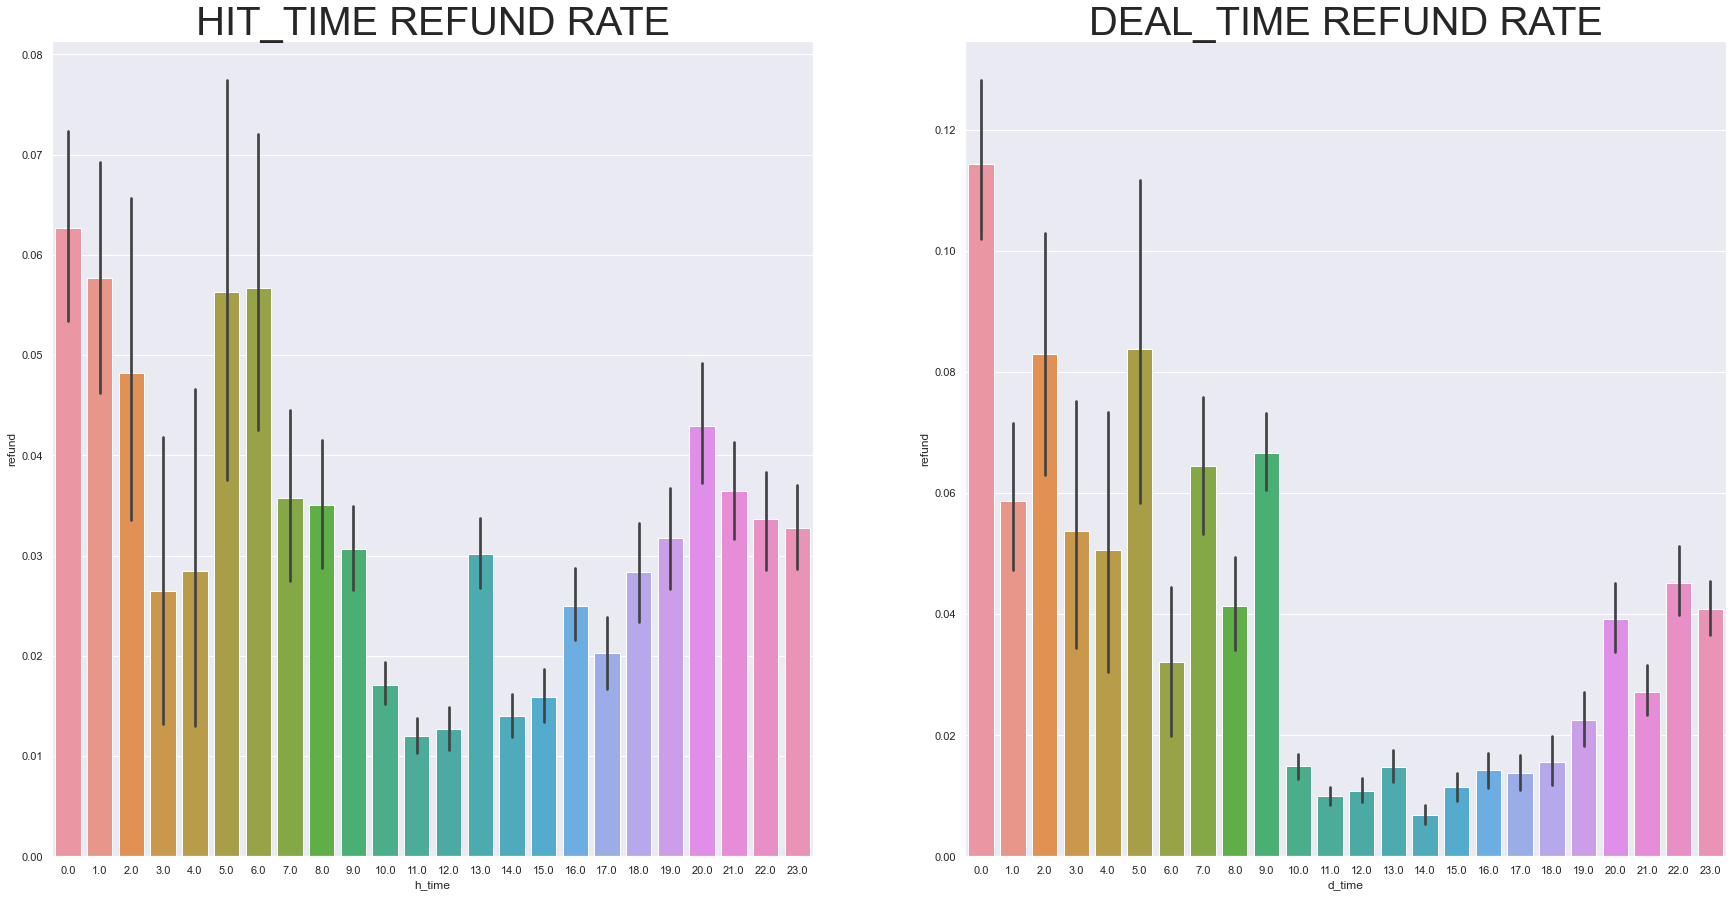

In [31]:
fig,axes=plt.subplots(1,2,figsize=(30,15))
ax1=sns.barplot(x='h_time',y='refund',data=df_hbl ,ax=axes[0])
ax2=sns.barplot(x='d_time',y='refund',data=df_hbl, ax=axes[1])
ax1.set_title("HIT_TIME REFUND RATE",fontsize=40)
ax2.set_title("DEAL_TIME REFUND RATE",fontsize=40)
plt.show()

# 실제 구매를 한 고객들의 자료에서 좌측이 조회시각별 환불비율 우측이 구매시각별 구매완료비율 0시-23시

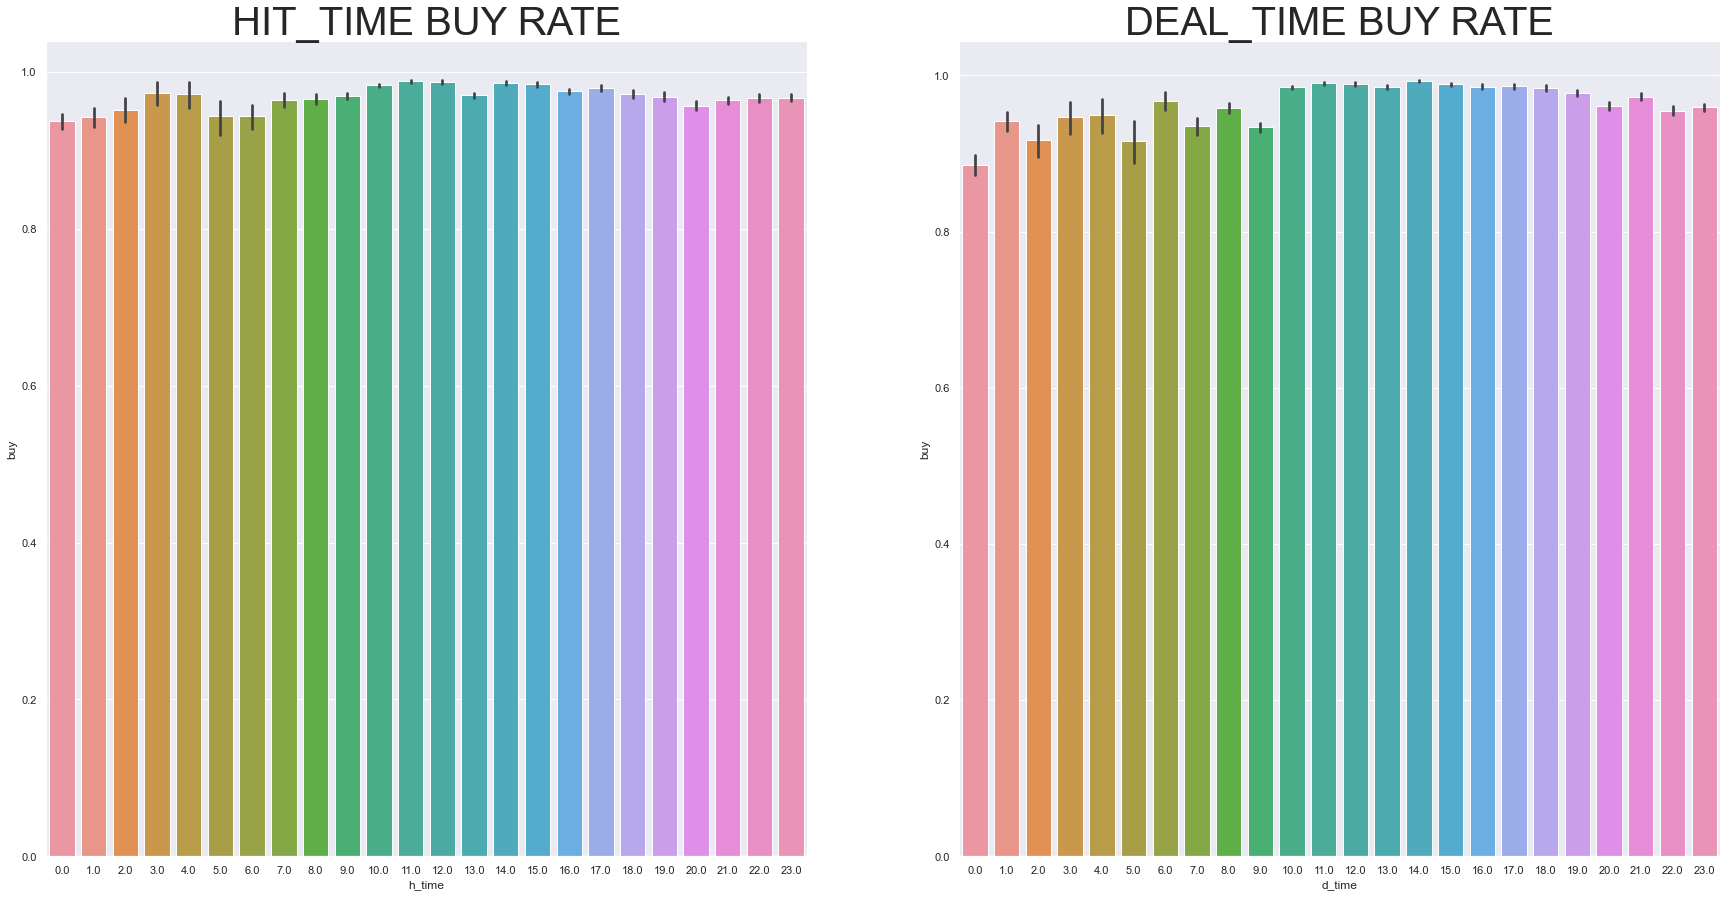

In [32]:
fig,axes=plt.subplots(1,2,figsize=(30,15))
ax1=sns.barplot(x='h_time',y='buy',data=df_hbl ,ax=axes[0])
ax2=sns.barplot(x='d_time',y='buy',data=df_hbl, ax=axes[1])
ax1.set_title("HIT_TIME BUY RATE",fontsize=40)
ax2.set_title("DEAL_TIME BUY RATE",fontsize=40)
plt.show()

In [33]:
# 고객의 성별과 나이대로 시간대별 구매완료비율을 시각화

In [34]:
df_hbl['clnt_gender'].value_counts()

F    112868
M     14490
Name: clnt_gender, dtype: int64

In [35]:
df_hbl['Sex']=0
df_hbl['Sex']=df_hbl['clnt_gender'].apply(lambda x:1 if x=='F' else 0)

In [36]:
df_hbl['clnt_age'].value_counts()

40    62184
30    37042
50    20639
20     4100
60     3280
10      113
Name: clnt_age, dtype: int64

In [37]:
df_hbl['clnt_age']=df_hbl['clnt_age'].astype(int)

In [38]:
# 연장자 , 주부 , 직장인 , 청년으로 구분
df_hbl['clnt']=0

In [39]:
df_hbl.loc[df_hbl['clnt_age']==60,'clnt']='은퇴노인'
df_hbl.loc[(df_hbl['clnt_age']<=20),'clnt' ]='젊은이'
df_hbl.loc[(df_hbl['clnt_age']==30) ,'clnt' ]='직장인'
df_hbl.loc[((df_hbl['clnt_age']>=40) & (df_hbl['clnt_age']<=50)) & (df_hbl['Sex']==1) ,'clnt' ]='주부'
df_hbl.loc[((df_hbl['clnt_age']>=40) & (df_hbl['clnt_age']<=50)) & (df_hbl['Sex']==0) ,'clnt' ]='직장인'
#범주형변수(정수) 로 바꾸면 히트맵에도 나타남

In [40]:
pd.crosstab(df_hbl.clnt,df_hbl.Sex).T.style.background_gradient(cmap='summer_r')

clnt,은퇴노인,젊은이,주부,직장인
Sex,,,,
0,681,734,0,13075
1,2599,3479,73077,33713


In [41]:
pd.crosstab(df_hbl.clnt,df_hbl.clnt_age).T.style.background_gradient(cmap='summer_r')

clnt,은퇴노인,젊은이,주부,직장인
clnt_age,,,,
10,0,113,0,0
20,0,4100,0,0
30,0,0,0,37042
40,0,0,54779,7405
50,0,0,18298,2341
60,3280,0,0,0


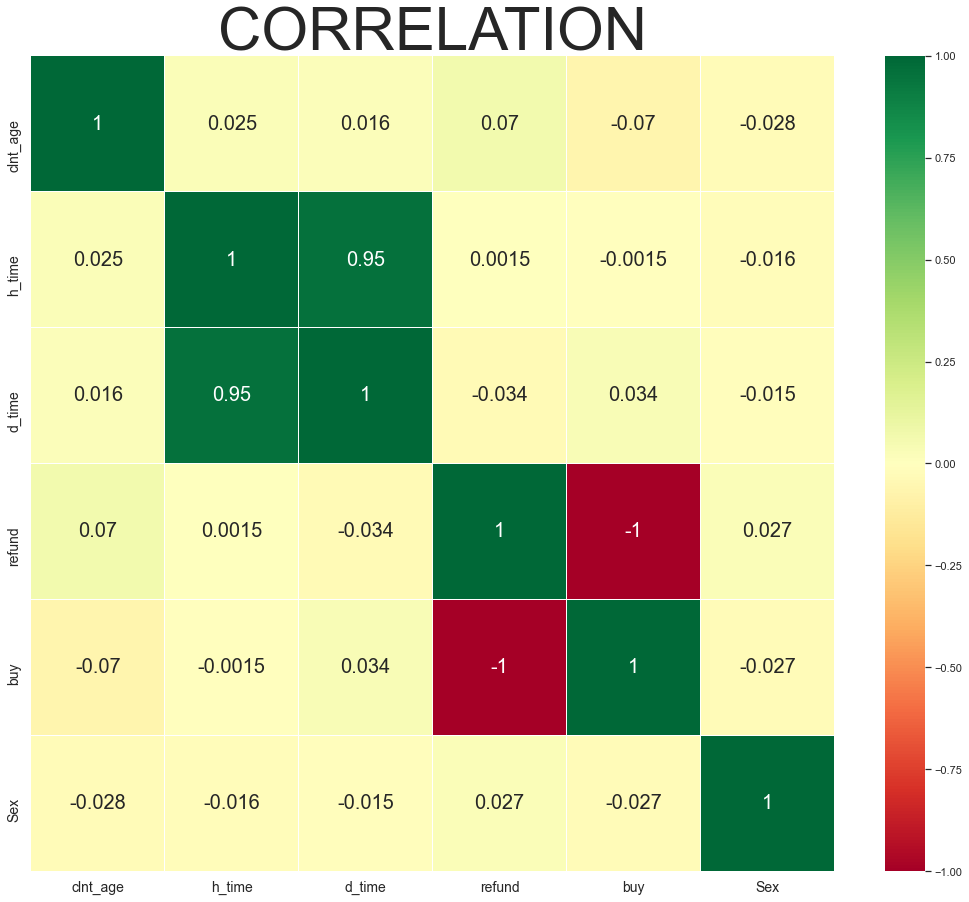

In [42]:
sns.heatmap(df_hbl.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title("CORRELATION",fontsize=60)
plt.show()

# 상품페이지에 머문시간대비 환불,구매비율  

--> 보통 환불할때는 고민을 다 하고 결정을 내린뒤에 상품을 조회한 후 바로 환불을 하니까 조회시간이 적을때 비율이 높을 것이라고 에상이 된다

In [43]:
df_hbl['tot_sess_hr_v']

0         1303
1         1303
2         1303
3         1303
4         1303
          ... 
127353    1200
127354    1200
127355     271
127356    3208
127357    1108
Name: tot_sess_hr_v, Length: 127358, dtype: object

In [44]:
df_hbl['tot_sess_hr_v'].isnull().sum()

300

In [45]:
df_hbl.dropna(subset=['tot_sess_hr_v'],inplace=True)

In [46]:
df_hbl['tot_sess_hr_v']=df_hbl['tot_sess_hr_v'].astype(int)

In [47]:
df_hbl['tot_sess_hr_v'].max()

24493

In [48]:
df_hbl['tot_sess_hr_v'].value_counts()

2        279
1        209
345      171
909      143
1016     141
        ... 
24493      1
5180       1
3199       1
4268       1
3701       1
Name: tot_sess_hr_v, Length: 4582, dtype: int64

## 상품페이지에 머문시간을 범주형 변수 s_time 으로 변환.

In [49]:
df_hbl['s_time']=(df_hbl['tot_sess_hr_v']/1000).astype(int)

In [50]:
df_hbl['s_time'].value_counts()

0     45119
1     40564
2     21999
3      9858
4      5107
5      2316
6      1139
7       416
8       300
9       147
10       44
11       16
13       14
14       11
15        7
24        1
Name: s_time, dtype: int64

## 상품페이지에 머문시간에 대비에 환불한 비율을 시각화한 것이다. 예상대로 머문시간이 적었을 때 구매환불 행동유형의 비율아 높게 나오지만 오래 머물렀을때도 비슷한 비율로 나타남을 확인할 수 있었다.
## 이런 결과가 나온 이유는 행동유형이 7인, 즉 구매환불을 한 고객의 데이터가 상대적으로 많지 않기 때문에 이상치가 나온 것이라고 본다.

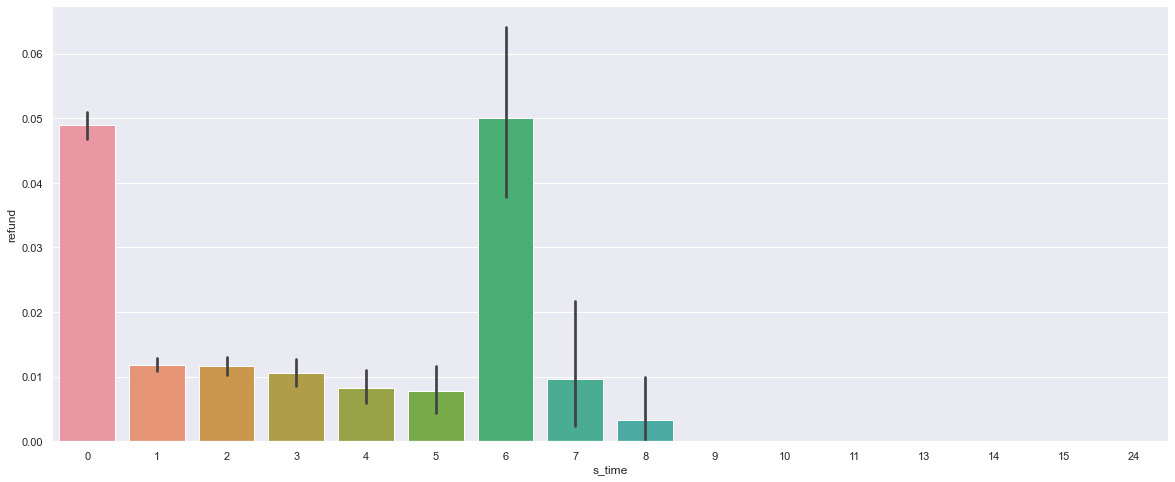

In [51]:
sns.barplot(x='s_time',y='refund',data=df_hbl)

# 여기서부터 raw data 각각으로 EDA 진행.

In [52]:
o_a

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,07809,001,008,5,A03,20190913,01:16,2571103,NaN,NaN,34,2663,DIRECT,NaN
1,07809,001,004,2,A03,20190913,01:14,2485909,NaN,NaN,34,2663,DIRECT,NaN
2,07809,001,011,5,A03,20190913,01:17,2646597,NaN,NaN,34,2663,DIRECT,NaN
3,07809,001,001,2,A03,20190913,00:46,788304,NaN,NaN,34,2663,DIRECT,NaN
4,07809,001,009,5,A03,20190913,01:17,2617609,NaN,NaN,34,2663,DIRECT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196357,31040,001,001,0,A02,20190815,03:47,13525,NaN,다이슨 에어랩,4,62,unknown,mobile_web
3196358,04129,001,002,0,A02,20190721,01:22,250099,NaN,여성메탈시계,3,250,unknown,mobile_web
3196359,04129,001,001,0,A02,20190721,01:18,1525,NaN,여성메탈시계,3,250,unknown,mobile_web
3196360,54403,003,001,0,A02,20190731,20:14,16905,NaN,비비고왕교자,3,68,unknown,mobile_app


# 온라인 행동정보의 고객 유입경로에 unknown 값이 꽤나 많이 등장하므로 결측치로 판단하여  결측값으로 바꾼 후 삭제해준다.

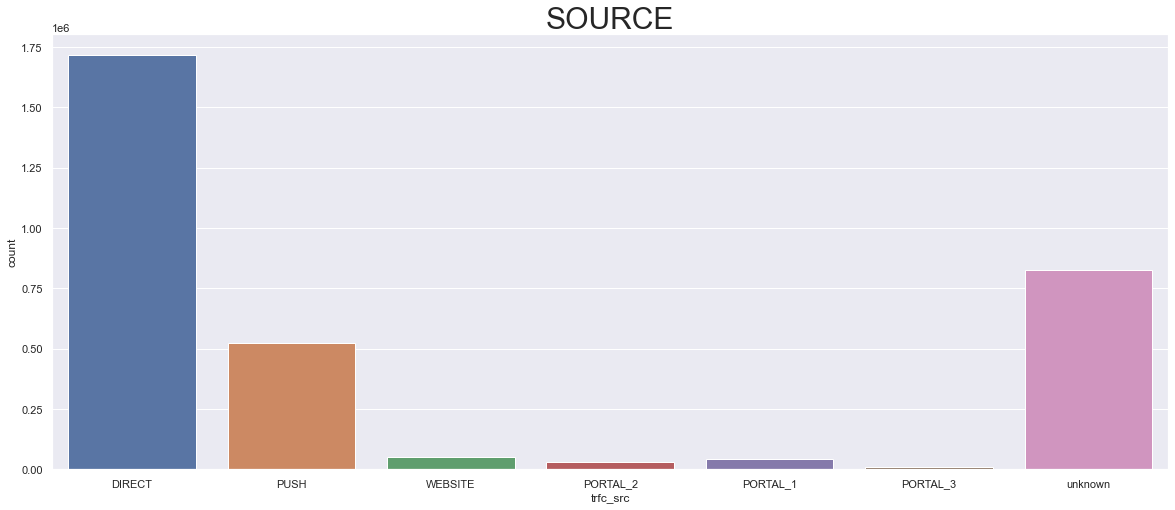

In [53]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x='trfc_src',data=o_a)
plt.title("SOURCE",fontsize=30)
plt.show()

In [54]:
o_a['trfc_src'].replace('unknown',np.nan,inplace=True)
o_a.dropna(subset=['trfc_src'],inplace=True)

# 온라인 행동정보에서 거래아이디(trans_id)와 검색키워드(sech_kwd),  기기유형(dvc_ctg_nm) 은 결측치가 상당한 비율로 나타나므로 마찬가지로 삭제해준다. 

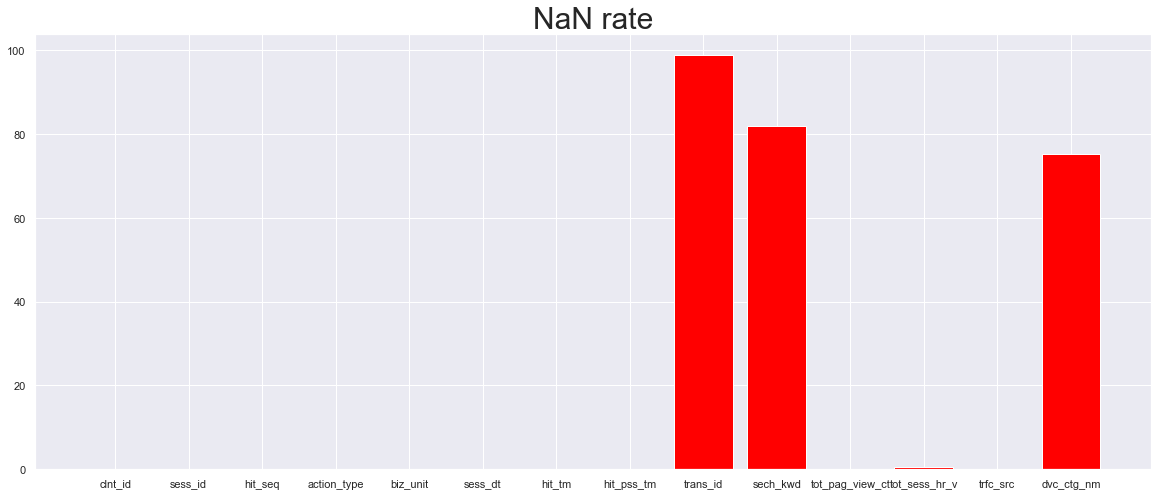

In [55]:
plt.bar(o_a.columns, (100*(o_a.isnull().sum()/o_a.shape[0])),color="red")
plt.title("NaN rate",fontsize=30)
plt.show()

## 기기유형 (dvc_ctg_nm) 온라인 행동유형 EDA에 활용할 데이터이므로 결측치만 제거해준다.

In [56]:
o_a.drop('trans_id',axis=1,inplace=True)
o_a.drop('sech_kwd',axis=1,inplace=True)
o_a.dropna(subset=['dvc_ctg_nm'],inplace=True)

In [57]:
o_a

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
97,28304,001,003,3,A03,20190716,11:29,501434,56,1303,PUSH,mobile_web
98,28304,001,012,5,A03,20190716,11:35,822660,56,1303,PUSH,mobile_web
99,28304,001,017,3,A03,20190716,11:37,990056,56,1303,PUSH,mobile_web
100,28304,001,007,5,A03,20190716,11:32,643327,56,1303,PUSH,mobile_web
101,28304,001,020,5,A03,20190716,11:39,1087859,56,1303,PUSH,mobile_web
...,...,...,...,...,...,...,...,...,...,...,...,...
3159752,02690,001,001,0,A02,20190715,18:56,0,1,NaN,PORTAL_3,PC
3163353,02033,001,001,0,A02,20190825,03:22,0,1,NaN,PORTAL_3,mobile_web
3188627,35588,001,001,0,A02,20190703,14:36,0,1,NaN,PORTAL_3,mobile_web
3192981,30891,001,001,0,A02,20190815,19:16,0,1,NaN,PORTAL_3,mobile_web


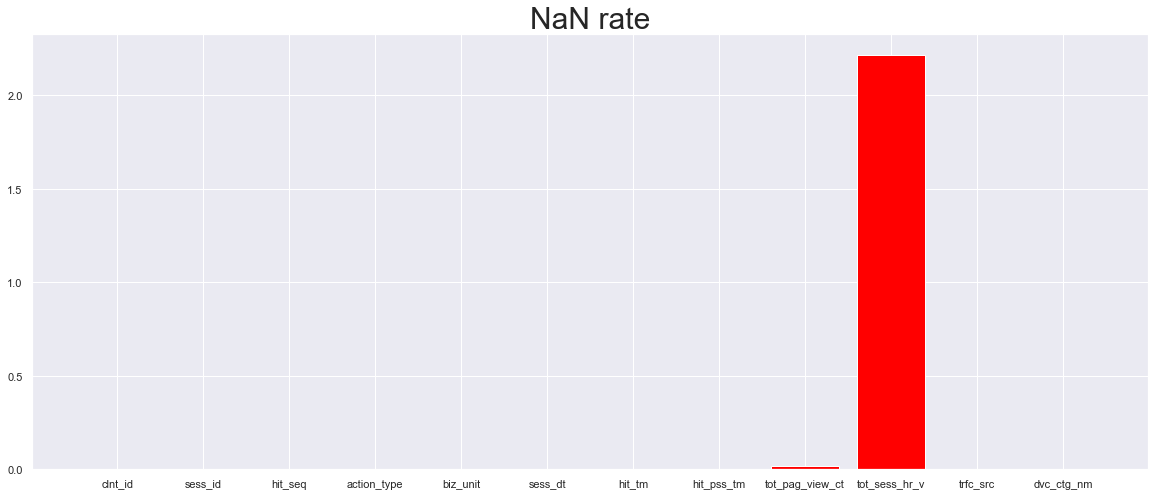

In [58]:
plt.bar(o_a.columns, (100*(o_a.isnull().sum()/o_a.shape[0])),color="red")
plt.title("NaN rate",fontsize=30)
plt.show()

# 총 8가지의 행동 유형을 구분한 코드 
-[0.검색 / 1.제품 목록 / 2.제품 세부정보 보기 / 3.장바구니 제품 추가 / 4.장바구니 제품 삭제 / 5.결제 시도 / 6.구매 완료 / 7.구매 환불 / 8.결제 옵션]

## 행동유형에서 결제시도 (5) 가 꽤나 높은 빈도수를 기록하는데 결제시도는 많은데 왜 구매완료는 그만큼 없을까? 
## 결제시도하고 구매완료를 한 시간대는 어느시간대일까? 



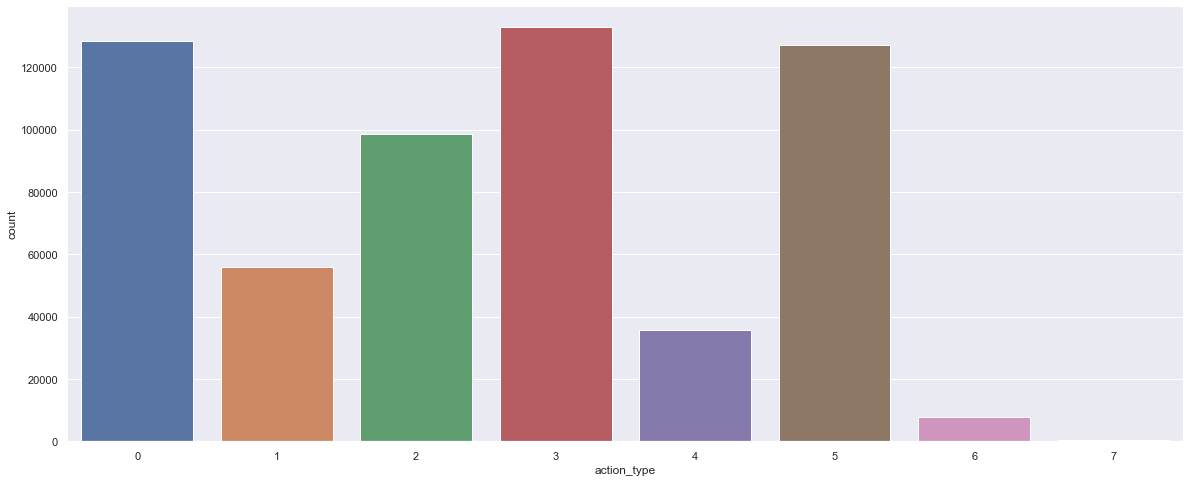

In [59]:
sns.countplot(x='action_type',data=o_a)

In [60]:
o_a['action_type'].value_counts()

3    132904
0    128298
5    127210
2     98555
1     55995
4     35844
6      7764
7       269
Name: action_type, dtype: int64

## -> 모바일 웹으로 접속한 시간대가 어떻게 될까? 우리의 경험상 활동하는 시간이나 일하는 시간인 낮시간대보다 늦은시간대에 모바일접속 비율이 많을 것 같다. 데이터를 분석해봤을 때도 동일한 결과가 나올까?

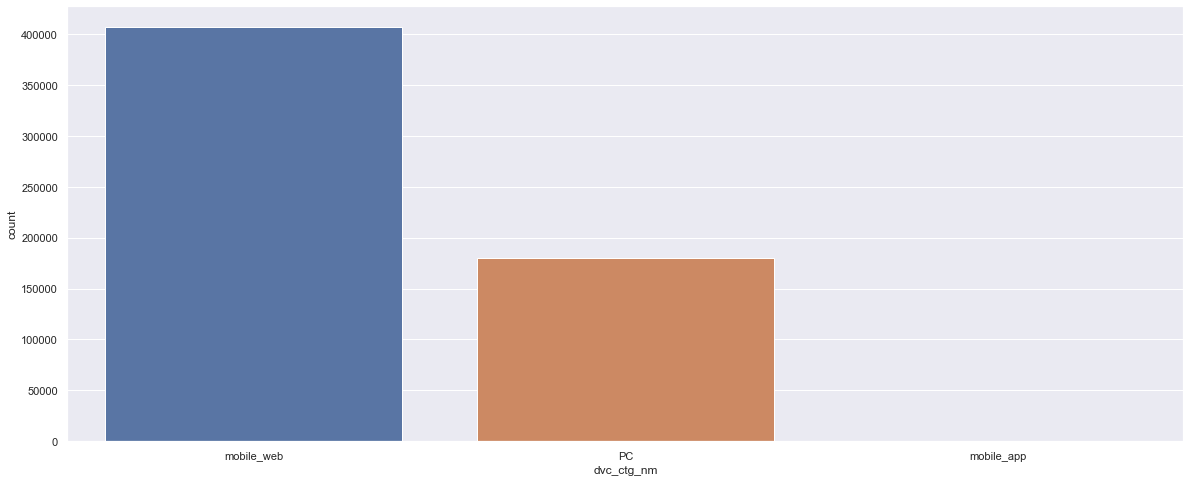

In [61]:
sns.countplot(x='dvc_ctg_nm',data=o_a)

In [62]:
o_a['dvc_ctg_nm'].value_counts()

mobile_web    406824
PC            179524
mobile_app       491
Name: dvc_ctg_nm, dtype: int64

## 주로 궁금한점이 시간대이기 때문에 시간변수를 읽을 수 있도록 특수문자를 제거한 후 범주형 변수로 변환해준다.

In [63]:
o_a['hit_tm']=o_a['hit_tm'].replace(':','',regex=True).astype(int)
for i in range(24):
    o_a.loc[(o_a['hit_tm']>(i*100)-1)&(o_a['hit_tm']<=(i*100)+59),'h_time']=i

In [64]:
o_a.drop('hit_tm',axis=1,inplace=True)

## 시간대별 결제시도 대비 구매완료 비율을 도출해냈다.

In [65]:
o_a.loc[o_a['action_type']=='5','action1']=0
o_a.loc[o_a['action_type']=='6','action1']=1
o_a[['h_time','action1']].groupby(['h_time'], as_index=False).mean()

,h_time,action1
0,0.0,0.067044
1,1.0,0.061251
2,2.0,0.058168
3,3.0,0.082589
4,4.0,0.059957
5,5.0,0.103586
6,6.0,0.052392
7,7.0,0.051491
8,8.0,0.056962
9,9.0,0.058182


# 조회시각별 결제시도대비 구매완료비율
## 새벽시간대에 볼 때 결제시도가 많을것이라고 기대했다. -> 3~5시에 평균적으로 많지만 생각보다 균등한 결과

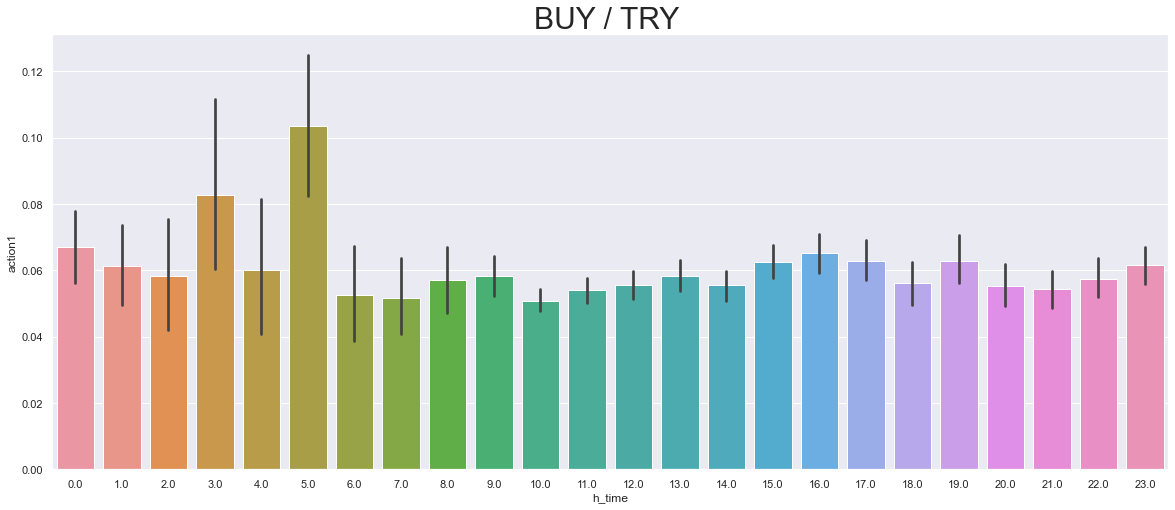

In [66]:
sns.barplot(x='h_time',y='action1' ,data=o_a)
plt.title("BUY / TRY ", fontsize=30)
plt.show()

## 모바일로 접속한 고객들이 궁금하기 때문에 source 변수를 만들었다. -모바일로 접속했다면 1 PC 면 0-

In [67]:
o_a['source']=o_a['dvc_ctg_nm'].apply(lambda x:0 if x=='PC' else 1)

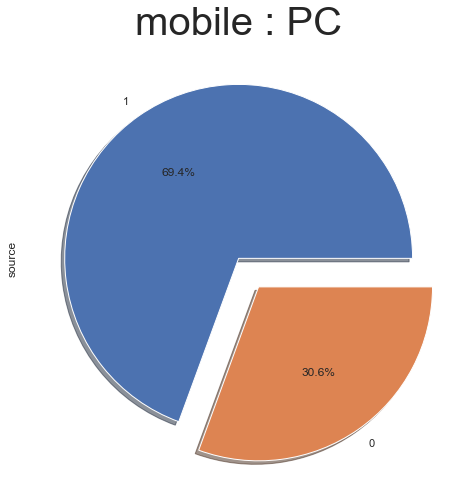

In [68]:
o_a['source'].value_counts().plot.pie(explode=[0,0.2], autopct='%1.1f%%', shadow=True)
plt.title("mobile : PC",fontsize=40)
plt.show()

# 일과시간이 지난 늦은 시간대에 모바일 접속량이 많을 것이라고 생각했지만 균등한 분포가 나타남을 확인했다.
## 예상과 다른 결과가 나온 이유는 요즘엔 모바일,피시 가리지 않고 사용하기 때문이라고 추론할 수 있었다

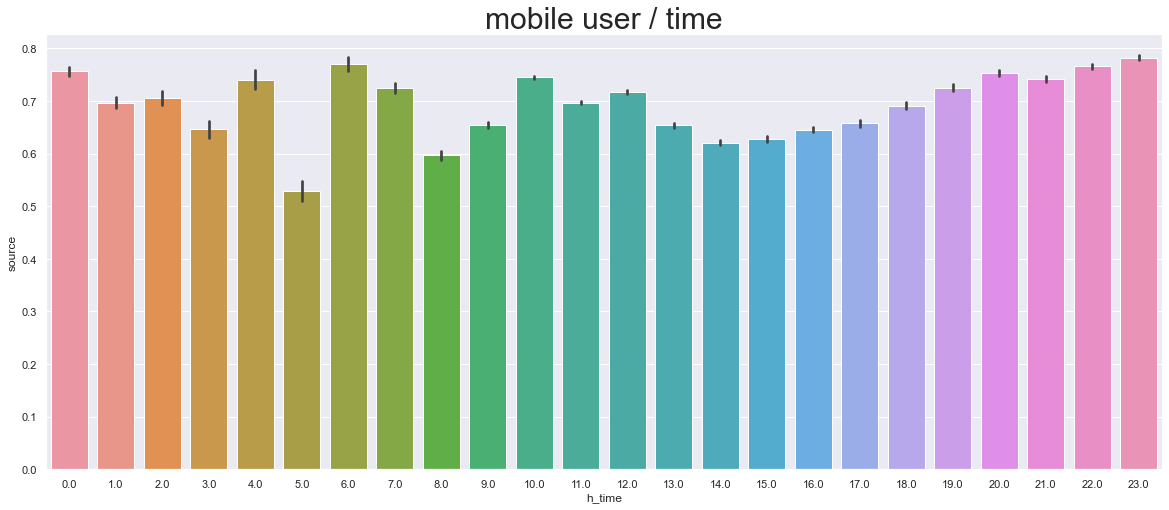

In [69]:
sns.barplot(x='h_time',y='source' ,data=o_a)
plt.title("mobile user / time",fontsize=30)
plt.show()

# 시간대별로 고객 유입경로를 시각화한것이다.

-일과시간엔 mobile , pc 를 불문하고 접속량이 많은편이고 새벽엔 접속량이 낮음을 알 수 있다.
-EDA 를 통해 일반적인 결과를 도출해냈다.

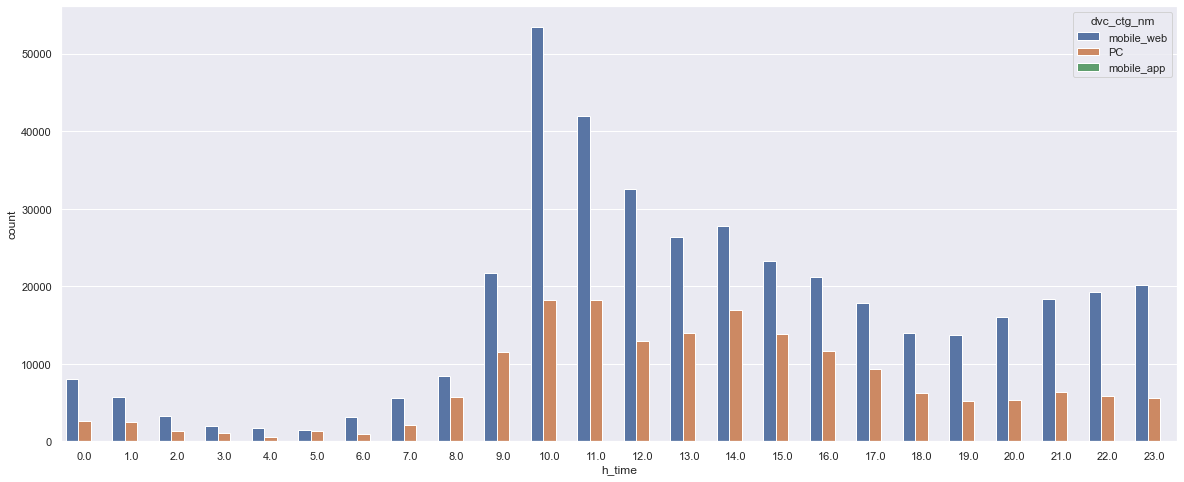

In [70]:
sns.countplot(x='h_time',hue='dvc_ctg_nm' ,data=o_a)

In [71]:
# 고객이 머문시간과 행동유형을 파악

In [72]:
o_a['tot_sess_hr_v'].isnull().sum()

12998

In [73]:
o_a.dropna(subset=['tot_sess_hr_v'],inplace=True)

In [74]:
o_a['tot_sess_hr_v']

97         1303
98         1303
99         1303
100        1303
101        1303
           ... 
3158587    4144
3158588    4144
3158589    4144
3158654     581
3158674     259
Name: tot_sess_hr_v, Length: 573841, dtype: object

In [75]:
o_a['tot_sess_hr_v']=o_a['tot_sess_hr_v'].astype(int)

In [76]:
o_a['s_time']=(o_a['tot_sess_hr_v']/1000).astype(int)

In [77]:
o_a['action_type']=o_a['action_type'].astype(int)

In [78]:
#행동유형별로 페이지에 머문시간의 평균값을 구해봤지만 너무 균등한 결과가 나와 데이터분석을 통해 특별한 insight 를 도출해내지는 못했고 ?
#결제시도나 구매완료를 했다면 오래 머물렀지 않을까 라는 궁금증에 데이터분석을 해봤지만 에상과 다른 결과가 나왔다. ? 

In [79]:
# [0.검색 / 1.제품 목록 / 2.제품 세부정보 보기 / 3.장바구니 제품 추가 / 4.장바구니 제품 삭제 / 5.결제 시도 / 6.구매 완료 / 7.구매 환불 / 8.결제 옵션]

In [80]:
# 상품을 본 시간이 길었을 때와 짧았을 때 행동한 유형의 비율 시각화
# s_time (머문시간) 이상치를 없애고 다시 시각화하는게 보기에 더 나을듯 

# 표본크기? 가 달라서 비율만 봐야할듯 --수정필요--

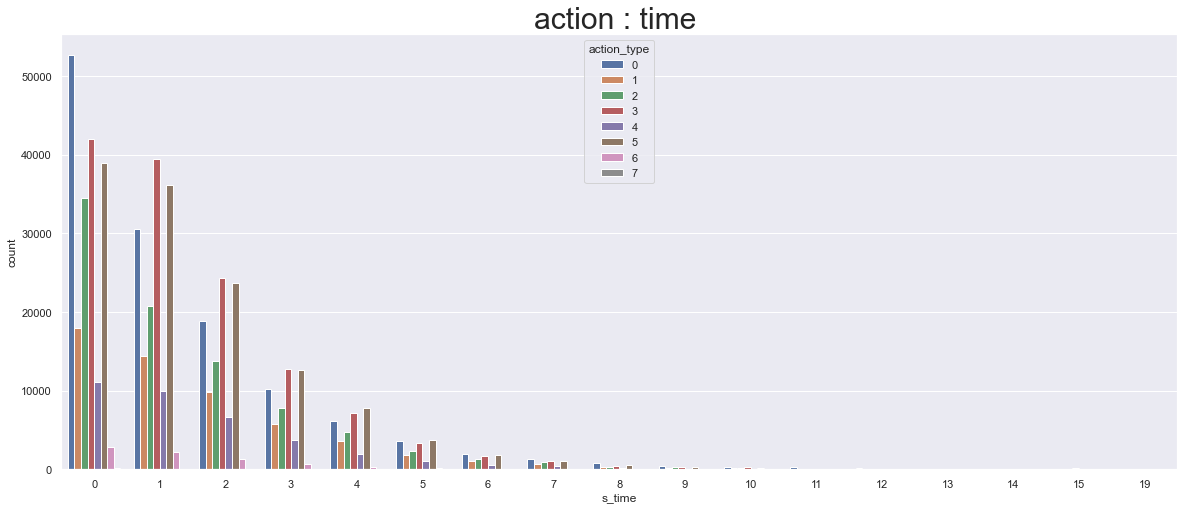

In [81]:
sns.countplot(x='s_time',hue='action_type',data=o_a)
plt.title("action : time ", fontsize=30)
plt.show()

In [82]:
#상품을 구매한 사람들은 어느시간대에 무슨 기기로 접속했을까?

In [83]:
o_a['d_device']=0
o_a.loc[(o_a['action_type']==6)&(o_a['source']==0),'d_device']=0
o_a.loc[(o_a['action_type']==6)&(o_a['source']==1),'d_device']=1

In [84]:
o_a['d_device'].value_counts()

0    568925
1      4916
Name: d_device, dtype: int64

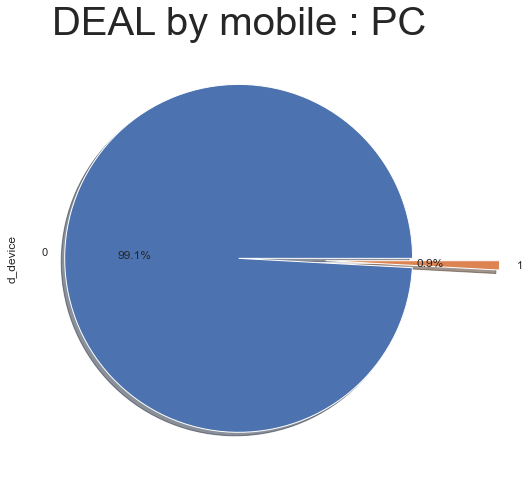

In [85]:
o_a['d_device'].value_counts().plot.pie(explode=[0,0.5], autopct='%1.1f%%', shadow=True)
plt.title("DEAL by mobile : PC",fontsize=40)
plt.show()

늦은시간대에 모바일로 상품을 구매하는 사람들이 많을것이라고 생각했지만 

낮시간대가 거래자체가 많아서 낮시간대의 거래와 밤시간대의 거래에 주로 사용된 기기를 찾기도 어렵고 위에도 보이다시피 모바일로 거래가 완료되는 경우가 대부분이었다.

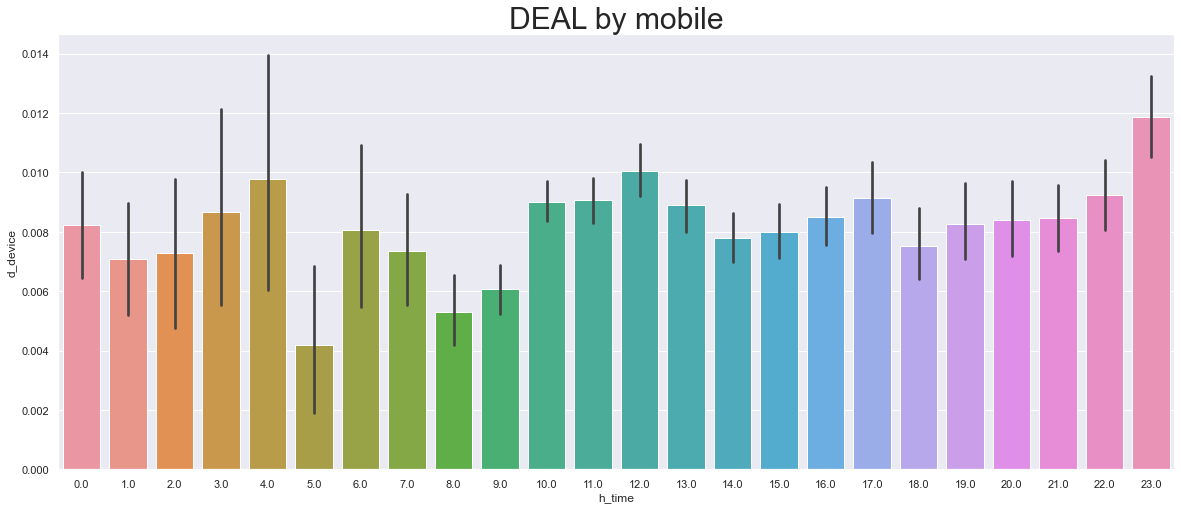

In [86]:
sns.barplot(x='h_time',y='d_device' ,data=o_a)
plt.title("DEAL by mobile",fontsize=30)
plt.show()

In [87]:
# 장바구니 제품삭제 - 구매완료
# 장바구니 제품추가 - 구매